## This script can be used to calculate Wet Bulb Temperature (WBT), Mean Radiant Temperature (MRT) and Wet Bulb Globe Temperature (WBGT) using standard meteorological outputs from WRF model

* The calculations are done using Thermofeel library which is developed by ECMWF. To know more about Thermofeel, feel free to read the paper below:
https://www.sciencedirect.com/science/article/pii/S2352711022000176#b18


* Thermofeel documentation is here:
https://thermofeel.readthedocs.io/en/latest/?

* Also a pdf of the documention can be found here:
https://thermofeel.readthedocs.io/_/downloads/en/latest/pdf/

* The Github repository of Thermofeel is located here:
https://github.com/ecmwf/thermofeel


In [ ]:
#These are all the libraries you will need to use this notebook
#https://github.com/ElsevierSoftwareX/SOFTX-D-21-00124/blob/master/examples/thermofeelexamplesourcecode1.py

!pip install thermofeel
!pip install netCDF4
import thermofeel
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import numpy as np
import thermofeel as tf

  Preparing metadata (setup.py) ... done
  Created wheel for thermofeel: filename=thermofeel-2.0.0-py3-none-any.whl size=19257 sha256=91d6f44264b9ed68b13147687ed52d1219a329397785cd28c8e5d7da5e3e89f9
  Stored in directory: /root/.cache/pip/wheels/13/ed/96/9273ffe8ffa6879082b70b5716fb2a46d4a6e6a7bbe408efca
Successfully built thermofeel
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00


In [ ]:
# Read model output data to be used in Thermofeel

import netCDF4 as nc
from scipy.ndimage import shift


# Read NetCDF files for lat and lon
lat_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
long_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
lat = lat_dataset['XLAT'][:]
lon = long_dataset['XLONG'][:]
print(lat.shape)
print(lon.shape)

# Relative humidity and dew point data were calculated with wrfout_to_cf_irr.ncl script

# Read NetCDF file for relative humidity at 2m
rh_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
rh_20 = rh_dataset['rh2m'][:]; del rh_dataset;
print(rh_20.shape)
rh_20_aug_sensor = rh_20[168:912, :, :]; del rh_20;#
rh_20_aug_sensor = shift(rh_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(rh_20_aug_sensor.shape)

# Read NetCDF file for dew point temperature at 2m
td_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_rh2m_irr.nc')
td_20 = td_dataset['td2m'][:]; del td_dataset;
print(td_20.shape)
td_20_aug_sensor = td_20[168:912, :, :]; del td_20;#
td_20_aug_sensor = shift(td_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(td_20_aug_sensor.shape)

# Read temperature
T2_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
T2_20 = T2_dataset['t2'][:]; del T2_dataset;
print(T2_20.shape)
T2_20_aug_sensor = T2_20[168:912, :, :]; del T2_20;#
T2_20_aug_sensor = shift(T2_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(T2_20_aug_sensor.shape)

# now read wind speed data

u_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
u_20 = u_dataset['u10'][:]; del u_dataset;
print(u_20.shape)
u_20_aug_sensor = u_20[168:912, :, :]; del u_20;#
u_20_20_aug_sensor = shift(u_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(u_20_aug_sensor.shape)

v_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
v_20 = v_dataset['v10'][:]; del v_dataset;
print(v_20.shape)
v_20_aug_sensor = v_20[168:912, :, :]; del v_20;#
v_20_20_aug_sensor = shift(v_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(v_20_aug_sensor.shape)

ws_20_aug_sensor = np.sqrt(u_20_20_aug_sensor**2+v_20_20_aug_sensor**2);

(171, 162)
(171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)


In [ ]:
# Now read radiation fields

coszen_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
coszen_20 = coszen_dataset['coszen'][:]; del coszen_dataset;
print(coszen_20.shape)
coszen_20_aug_sensor = coszen_20[168:912, :, :]; del coszen_20;#
coszen_20_aug_sensor = shift(coszen_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(coszen_20_aug_sensor.shape)

swdown_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swdown_20 = swdown_dataset['swdown'][:]; del swdown_dataset;
print(swdown_20.shape)
swdown_20_aug_sensor = swdown_20[168:912, :, :]; del swdown_20;#
swdown_20_aug_sensor = shift(swdown_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swdown_20_aug_sensor.shape)

glw_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
glw_20 = glw_dataset['glw'][:]; del glw_dataset;
print(glw_20.shape)
glw_20_aug_sensor = glw_20[168:912, :, :]; del glw_20;#
glw_20_aug_sensor = shift(glw_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(glw_20_aug_sensor.shape)

swddir_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddir_20 = swddir_dataset['swddir'][:]; del swddir_dataset;
print(swddir_20.shape)
swddir_20_aug_sensor = swddir_20[168:912, :, :]; del swddir_20;#
swddir_20_aug_sensor = shift(swddir_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddir_20_aug_sensor.shape)

swddni_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swddni_20 = swddni_dataset['swddni'][:]; del swddni_dataset;
print(swddni_20.shape)
swddni_20_aug_sensor = swddni_20[168:912, :, :]; del swddni_20;#
swddni_20_aug_sensor = shift(swddni_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swddni_20_aug_sensor.shape)

swupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
swupb_20 = swupb_dataset['swupb'][:]; del swupb_dataset;
print(swupb_20.shape)
swupb_20_aug_sensor = swupb_20[168:912, :, :]; del swupb_20;#
swupb_20_aug_sensor = shift(swupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(swupb_20_aug_sensor.shape)

lwupb_dataset = nc.Dataset('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/1km_aug_sensor_select_new_irr.nc')
lwupb_20 = lwupb_dataset['lwupb'][:]; del lwupb_dataset;
print(lwupb_20.shape)
lwupb_20_aug_sensor = lwupb_20[168:912, :, :]; del lwupb_20;#
lwupb_20_aug_sensor = shift(lwupb_20_aug_sensor, shift=(-8, 0, 0), cval=np.NaN) # match with PST local time -8
print(lwupb_20_aug_sensor.shape)



(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)
(913, 171, 162)
(744, 171, 162)


In [ ]:
#Check the availability of thermofeel functions and import them
print(dir(thermofeel))

# import the required thermofeel functions

from thermofeel import (
    calculate_apparent_temperature,
    calculate_bgt,
    calculate_heat_index_adjusted,
    calculate_heat_index_simplified,
    calculate_humidex,
    calculate_mean_radiant_temperature,
    calculate_mrt_from_bgt,
    calculate_normal_effective_temperature,
    calculate_relative_humidity_percent,
    calculate_saturation_vapour_pressure,
    calculate_utci,
    calculate_wbgt_simple,
    calculate_wbgt,
    calculate_wbgt_simple,
    calculate_wbt,
    calculate_wind_chill,
    kelvin_to_celsius,
    kelvin_to_fahrenheit,
    approximate_dsrp,
    helpers,
)

# check the input parameters required by a function
help(calculate_wbt)
help(calculate_mean_radiant_temperature)
help(calculate_wbgt)
help(calculate_bgt)
help(calculate_wbgt_simple)
help(calculate_mrt_from_bgt)
help(helpers)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'approximate_dsrp', 'calculate_apparent_temperature', 'calculate_bgt', 'calculate_dew_point_from_relative_humidity', 'calculate_heat_index_adjusted', 'calculate_heat_index_simplified', 'calculate_humidex', 'calculate_mean_radiant_temperature', 'calculate_mrt_from_bgt', 'calculate_nonsaturation_vapour_pressure', 'calculate_normal_effective_temperature', 'calculate_relative_humidity_percent', 'calculate_saturation_vapour_pressure', 'calculate_saturation_vapour_pressure_multiphase', 'calculate_utci', 'calculate_utci_polynomial', 'calculate_wbgt', 'calculate_wbgt_simple', 'calculate_wbt', 'calculate_wind_chill', 'celsius_to_kelvin', 'fahrenheit_to_kelvin', 'helpers', 'kelvin_to_celsius', 'kelvin_to_fahrenheit', 'math', 'np', 'scale_windspeed', 'thermofeel', 'to_radians']
Help on function calculate_wbt in module thermofeel.thermofeel:

calculate_wbt(t2_k, rh)

In [ ]:

# Calculation the net radiation fields required, which are input to GT/WBGT

ssr = swdown_20_aug_sensor-swupb_20_aug_sensor # surface net solar radiation
strr = glw_20_aug_sensor-lwupb_20_aug_sensor # surface net thermal radiation

ssrd = swdown_20_aug_sensor;
dsrp = swddni_20_aug_sensor;
strd = glw_20_aug_sensor;
fdir = swddir_20_aug_sensor;
cossza = coszen_20_aug_sensor;
td_k = td_20_aug_sensor;
t2_k = T2_20_aug_sensor;
va = ws_20_aug_sensor;
rh = rh_20_aug_sensor

print(np.max(cossza))
print(np.min(cossza))

nan
nan


In [ ]:
# To calculate WBGT, we neet WBT (we bulb temperature), GT (globe temperature) and dry-bulb temperature (2-m air temp.)

# First Calculate WBT

tw_k = calculate_wbt(t2_k, rh)

# convert to F for plotting
tw_f = kelvin_to_fahrenheit(tw_k)

# convert to C for the use in WBGT
tw_c = kelvin_to_celsius(tw_k)
print('tw_c')
print(np.nanmax(tw_c))
print(np.nanmin(tw_c))


# Now calculate mean radiant temperature (mrt) because it is an input for calculating the Black Globe Temperature (bgt)
# this is necessary since black globe temperature is not commonly available. It should be in K

mrt = calculate_mean_radiant_temperature(ssrd=ssrd, ssr=ssr, dsrp=dsrp, strd=strd, fdir=fdir, strr=strr, cossza=cossza)
print('mrt')
print(np.nanmax(mrt))
print(np.nanmin(mrt))

# Now calculate Black Globe Temperature using the above-calculated MRT and then calculate WBGT

import math

from thermofeel.helpers import (celsius_to_kelvin, fahrenheit_to_kelvin, kelvin_to_celsius, kelvin_to_fahrenheit)

#converting to float128 was needed to avoid a warning in calculating bgt because there are so many smaller terms in the equation

t2_k = np.float128(t2_k)
mrt = np.float128(mrt)
va = np.float128(va)

bgt_k = calculate_bgt(t2_k, mrt, va)
print('bgt_k')
print(np.nanmax(bgt_k))
print(np.nanmin(bgt_k))

# Convert bgt from C to F for plotting
bgt_f = kelvin_to_fahrenheit(bgt_k)

#convert bgt in Kelvin to Celsius to be used in WBGT
bgt_c = kelvin_to_celsius(bgt_k)

# convert 2-m air temperature from Kelvin to F for plotting
t2_f = kelvin_to_fahrenheit(t2_k)

# convert 2-m air temperature from Kelvin to Celsius to be used in WBGT
t2_c = kelvin_to_celsius(t2_k)

# Now calculate WBGT

wbgt = 0.7 * tw_c + 0.2 * bgt_c + 0.1 * t2_c
wbgt_k = celsius_to_kelvin(wbgt)

wbgt_f = kelvin_to_fahrenheit(wbgt_k)
print(wbgt_f.shape)
print(np.nanmax(wbgt_f))
print(np.nanmin(wbgt_f))

/usr/local/lib/python3.10/dist-packages/thermofeel/thermofeel.py:546: RuntimeWarning: invalid value encountered in power
  + 0.00391838 * (rh) ** (3 / 2) * np.arctan(0.023101 * rh)


tw_c
33.80313
-0.7930908
mrt
362.50577
259.936
bgt_k
350.10933938816651073
267.24476250852209774
(744, 171, 162)
98.730731940683517114
32.7136062498431352


In [ ]:
# calculate max and min for tw_f (wet bulb temp in F)

tw_f_reshape = np.reshape(tw_f, (24, 31, 171, 162), order='F');

tw_f_max = np.max(tw_f_reshape, axis=0);
tw_f_max_mon = np.nanmean(tw_f_max, axis=0)

tw_f_min = np.min(tw_f_reshape, axis=0);
tw_f_min_mon = np.nanmean(tw_f_min, axis=0)

# calculate max and min for bgt_f (globe temperature in F)

bgt_f_reshape = np.reshape(bgt_f, (24, 31, 171, 162), order='F'); del bgt_f;

bgt_f_max = np.max(bgt_f_reshape, axis=0);
bgt_f_max_mon = np.nanmean(bgt_f_max, axis=0)

bgt_f_min = np.min(bgt_f_reshape, axis=0);
bgt_f_min_mon = np.nanmean(bgt_f_min, axis=0)

# calculate max and min for t2_f (dry-bulb temperature)

t2_f_reshape = np.reshape(t2_f, (24, 31, 171, 162), order='F');

t2_f_max = np.max(t2_f_reshape, axis=0);
t2_f_max_mon = np.nanmean(t2_f_max, axis=0)

t2_f_min = np.min(t2_f_reshape, axis=0);
t2_f_min_mon = np.nanmean(t2_f_min, axis=0)

# calculate max and min for wbgt_f (wet bulb globe temperatuer in F)

wbgt_f_reshape = np.reshape(wbgt_f, (24, 31, 171, 162), order='F');

wbgt_f_max = np.max(wbgt_f_reshape, axis=0);
wbgt_f_max_mon = np.nanmean(wbgt_f_max, axis=0)

wbgt_f_min = np.min(wbgt_f_reshape, axis=0);
wbgt_f_min_mon = np.nanmean(wbgt_f_min, axis=0)

print(np.nanmax(tw_f_max.flatten()))
print(np.nanmin(tw_f_max.flatten()))

print(np.nanmax(bgt_f_max.flatten()))
print(np.nanmin(bgt_f_max.flatten()))

print(np.nanmax(t2_f_max.flatten()))
print(np.nanmin(t2_f_max.flatten()))

print(np.nanmax(wbgt_f_max.flatten()))
print(np.nanmin(wbgt_f_max.flatten()))


92.845634
40.825645
170.52681089869976025
66.45764682908410066
121.81190307617191593
59.53419921875004093
98.730731940683517114
47.924763802549506526


In [ ]:
!pip install cartopy
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

# Load the county and lake shapefiles
counties = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp")
salton = gpd.read_file("/content/drive/MyDrive/Google_Drive_UTmail/SDSU/python_colab_data/Salton_geog/Salton_geog.shp")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
# calculate Day and night WBT
tw_f_diurnal_aug_day_sensor = tw_f_reshape[7:19, :, :, :];
tw_f_diurnal_aug_night_sensor = tw_f_reshape[np.r_[0:7, 19:24], :, :, :];

# day and nightmean plot

tw_f_diurnal_aug_day_sensor_mn = np.nanmean(tw_f_diurnal_aug_day_sensor, axis=0);
tw_f_diurnal_aug_day_sensor_mn_mon = np.nanmean(tw_f_diurnal_aug_day_sensor_mn, axis=0); # plot this daymean for sensor 1

tw_f_diurnal_aug_night_sensor_mn = np.nanmean(tw_f_diurnal_aug_night_sensor, axis=0);
tw_f_diurnal_aug_night_sensor_mn_mon = np.nanmean(tw_f_diurnal_aug_night_sensor_mn, axis=0); # plot this nightmean for sensor 2

print(tw_f_diurnal_aug_day_sensor_mn_mon.shape)
print(tw_f_diurnal_aug_night_sensor_mn_mon.shape)

wbgt_f_diurnal_aug_day_sensor = wbgt_f_reshape[7:19, :, :, :];
wbgt_f_diurnal_aug_night_sensor = wbgt_f_reshape[np.r_[0:7, 19:24], :, :, :];

# day and nightmean plot

wbgt_f_diurnal_aug_day_sensor_mn = np.nanmean(wbgt_f_diurnal_aug_day_sensor, axis=0);
wbgt_f_diurnal_aug_day_sensor_mn_mon = np.nanmean(wbgt_f_diurnal_aug_day_sensor_mn, axis=0); # plot this daymean for sensor 1

wbgt_f_diurnal_aug_night_sensor_mn = np.nanmean(wbgt_f_diurnal_aug_night_sensor, axis=0);
wbgt_f_diurnal_aug_night_sensor_mn_mon = np.nanmean(wbgt_f_diurnal_aug_night_sensor_mn, axis=0); # plot this nightmean for sensor 2



print(wbgt_f_diurnal_aug_day_sensor_mn_mon.shape)
print(wbgt_f_diurnal_aug_night_sensor_mn_mon.shape)

wbt_wbgt_ratio_day = tw_f_diurnal_aug_day_sensor_mn_mon/wbgt_f_diurnal_aug_day_sensor_mn_mon;
wbt_wbgt_ratio_night = tw_f_diurnal_aug_night_sensor_mn_mon/wbgt_f_diurnal_aug_night_sensor_mn_mon;

(171, 162)
(171, 162)
(171, 162)
(171, 162)


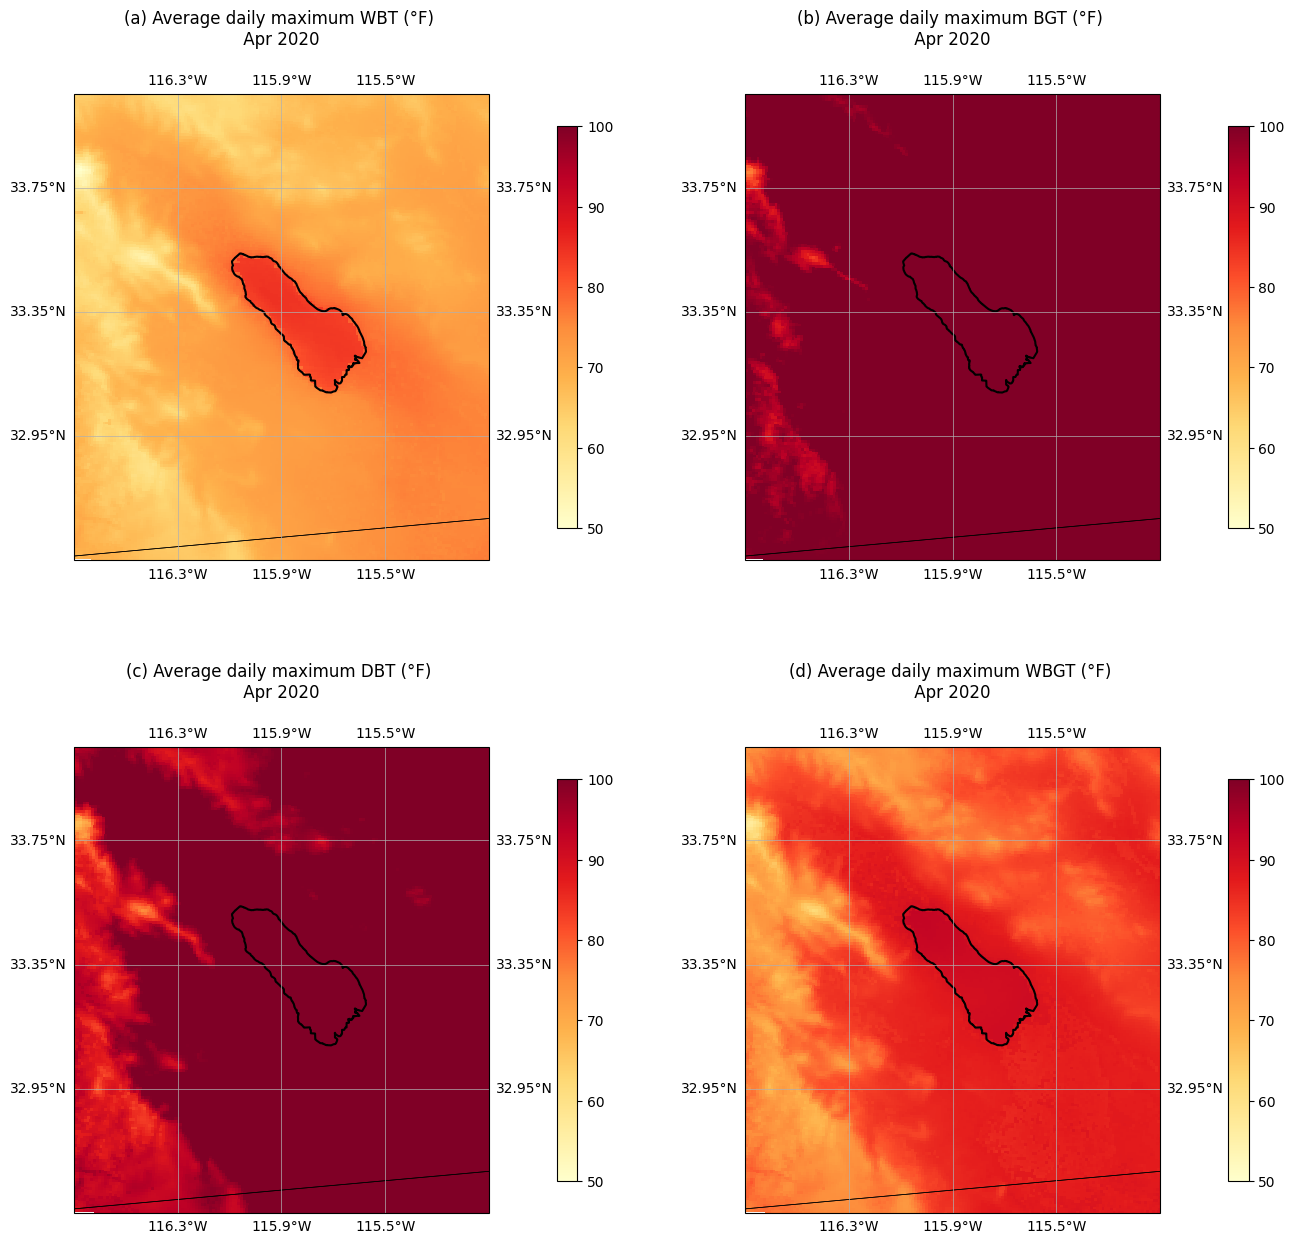

In [ ]:
# plot WBGT terms

fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.18, hspace=0.3)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, tw_f_max_mon, cmap='YlOrRd', vmin=50, vmax=100)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='none')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Average daily maximum WBT (\u00b0F) \n Apr 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

# Second subplot
ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, bgt_f_max_mon, cmap='YlOrRd', vmin=50, vmax=100)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='none')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Average daily maximum BGT (\u00b0F) \n Apr 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)

# Third subplot
ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, t2_f_max_mon, cmap='YlOrRd', vmin=50, vmax=100)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='none')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Average daily maximum DBT (\u00b0F) \n Apr 2020 \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=0.8, pad=0.12)

# Fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, wbgt_f_max_mon, cmap='YlOrRd', vmin=50, vmax=100)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='none')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) Average daily maximum WBGT (\u00b0F) \n Apr 2020 \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=0.8, pad=0.12)



#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_aug.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()

In [ ]:
# Calculate number of days in August exceeding a given threshold in the day and night separately (at least once or one hour)
# separate the data into day and night
wbgt_f_reshape_day_sensor = wbgt_f_reshape[7:19, :, :, :];
wbgt_f_reshape_night_sensor = wbgt_f_reshape[np.r_[0:7, 19:24], :, :, :];


wbgt_f_reshape_day_sensor_new = np.reshape(wbgt_f_reshape_day_sensor, (372, 171, 162), order='F');
wbgt_f_reshape_night_sensor_new = np.reshape(wbgt_f_reshape_night_sensor, (372, 171, 162), order='F');

# Calculate the exceeding days for day and night separately
wbgt_f_day_exceed_80_days = np.sum(np.any(wbgt_f_reshape_day_sensor > 80, axis=0), axis=0) # note the combination of any and sum to calculate number of days
wbgt_f_night_exceed_80_night = np.sum(np.any(wbgt_f_reshape_night_sensor > 80, axis=0), axis=0)


# Calculate the exceeding days for day and night separately
wbgt_f_hour_exceed_80_day = np.sum(wbgt_f_reshape_day_sensor_new > 80, axis=0)
wbgt_f_hour_exceed_80_night = np.sum(wbgt_f_reshape_night_sensor_new > 80, axis=0)
wbgt_f_hour_exceed_95_day = np.sum(wbgt_f_reshape_day_sensor_new > 95, axis=0)
wbgt_f_hour_exceed_95_night = np.sum(wbgt_f_reshape_night_sensor_new > 95, axis=0)


# for DBT

# separate the data into day and night
t2_f_reshape_day_sensor = t2_f_reshape[7:19, :, :, :];
t2_f_reshape_night_sensor = t2_f_reshape[np.r_[0:7, 19:24], :, :, :];
t2_f_reshape_day_sensor_new = np.reshape(t2_f_reshape_day_sensor, (372, 171, 162), order='F');
t2_f_reshape_night_sensor_new = np.reshape(t2_f_reshape_night_sensor, (372, 171, 162), order='F');

# Calculate the exceeding days for day and night separately
t2_f_hour_exceed_80_day = np.sum(t2_f_reshape_day_sensor_new > 80, axis=0)
t2_f_hour_exceed_80_night = np.sum(t2_f_reshape_night_sensor_new > 80, axis=0)
t2_f_hour_exceed_95_day = np.sum(t2_f_reshape_day_sensor_new > 95, axis=0)
t2_f_hour_exceed_95_night = np.sum(t2_f_reshape_night_sensor_new > 95, axis=0)

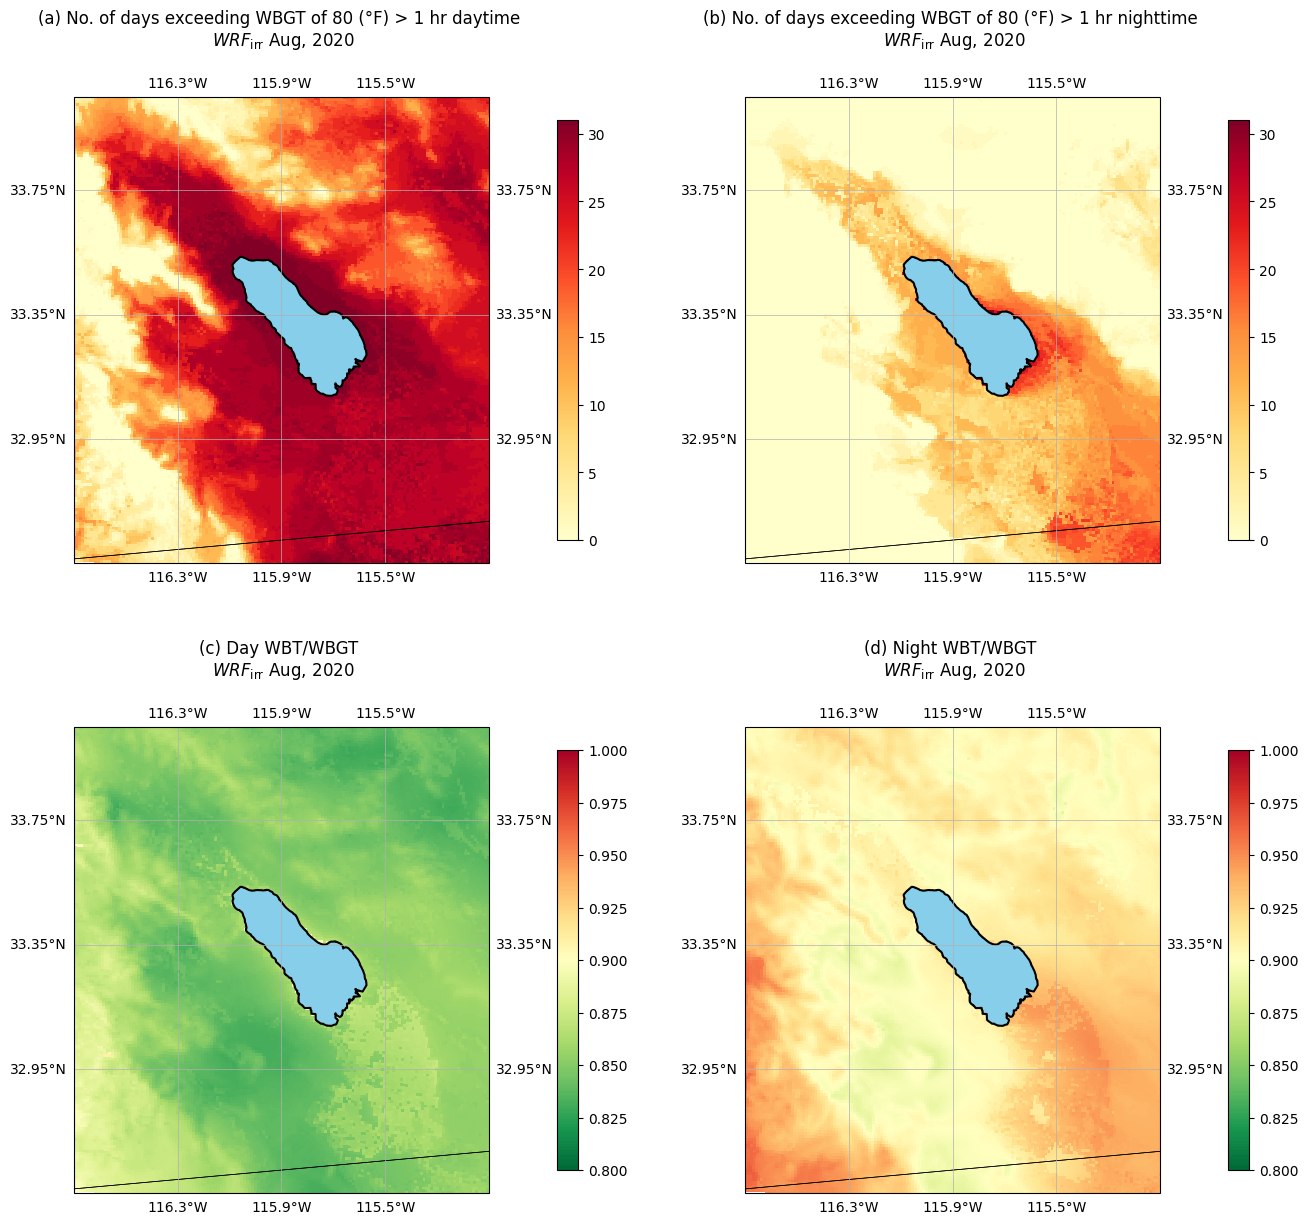

In [ ]:
fig, ((ax_1, ax_2), (ax_3, ax_4)) = plt.subplots(2, 2, figsize=(16, 15), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.18, hspace=0.2)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_day_exceed_80_days, cmap='YlOrRd', vmin=0, vmax=31)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) No. of days exceeding WBGT of 80 (\u00b0F) > 1 hr daytime \n $WRF_{\\mathrm{irr}}$ Aug, 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_night_exceed_80_night, cmap='YlOrRd', vmin=0, vmax=31)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) No. of days exceeding WBGT of 80 (\u00b0F) > 1 hr nighttime \n $WRF_{\\mathrm{irr}}$ Aug, 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)

# third subplot
ax_3.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_3 = ax_3.pcolormesh(lon, lat, wbt_wbgt_ratio_day, cmap='RdYlGn_r', vmin=0.8, vmax=1)
counties.plot(ax=ax_3, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_3, linewidth=1.5, color='black', facecolor='skyblue')
ax_3.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_3.set_title('(c) Day WBT/WBGT \n $WRF_{\\mathrm{irr}}$ Aug, 2020 \n');
cbar_3 = plt.colorbar(mesh_3, ax=ax_3, shrink=0.8, pad=0.12)

# fourth subplot
ax_4.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_4 = ax_4.pcolormesh(lon, lat, wbt_wbgt_ratio_night, cmap='RdYlGn_r', vmin=0.8, vmax=1)
#quiver_plot.set_linewidths(10)
counties.plot(ax=ax_4, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_4, linewidth=1.5, color='black', facecolor='skyblue')
ax_4.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_4.set_title('(d) Night WBT/WBGT \n $WRF_{\\mathrm{irr}}$ Aug, 2020 \n');
cbar_4 = plt.colorbar(mesh_4, ax=ax_4, shrink=0.8, pad=0.12)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_exceedance_aug_lus_wbt_wbgt_ratio.png', bbox_inches='tight', dpi=300)

#display the plot
plt.show()

In [ ]:
# Calculate number of hours exceeding a given threshold using all data, plot it on the right of the plot
wbgt_f_hour_exceed_80 = np.sum(wbgt_f > 80, axis=0)
wbgt_f_hour_exceed_80_restm_perhour = wbgt_f_hour_exceed_80*15/(24*31)  # 15 minutes every hour

t2_f_hour_exceed_95 = np.sum(t2_f > 95, axis=0)
t2_f_hour_exceed_95_restm_perhour = t2_f_hour_exceed_95*5/(24*31)

diff_restm_perhour = wbgt_f_hour_exceed_80_restm_perhour-t2_f_hour_exceed_95_restm_perhour;


# This is the final one showing locations exceeding 1 hour in April
import numpy as np

# Extract temperature values exceeding 90, 80-90, 85-88, and 80-85
# total points = 12*30 = 360 for each day and night data. 10% of the time is 72 hours and 5% is 36 hours
category_90_hour = np.sum((wbgt_f >= 90), axis=0) > 36
category_88_90_hour = np.sum((wbgt_f >= 88) & (wbgt_f < 90), axis=0) > 36
category_85_88_hour = np.sum((wbgt_f >= 85) & (wbgt_f < 88), axis=0) > 36
category_80_85_hour = np.sum((wbgt_f >= 80) & (wbgt_f < 85), axis=0) > 36


# Create a classified temperature map with NaN values
classified_map_hour = np.full_like(category_90_hour, np.nan, dtype=float)

# Assign categories based on conditions
classified_map_hour[category_80_85_hour] = 4
classified_map_hour[category_85_88_hour] = 3
classified_map_hour[category_88_90_hour] = 2
classified_map_hour[category_90_hour] = 1




In [ ]:
category_90_hour.shape

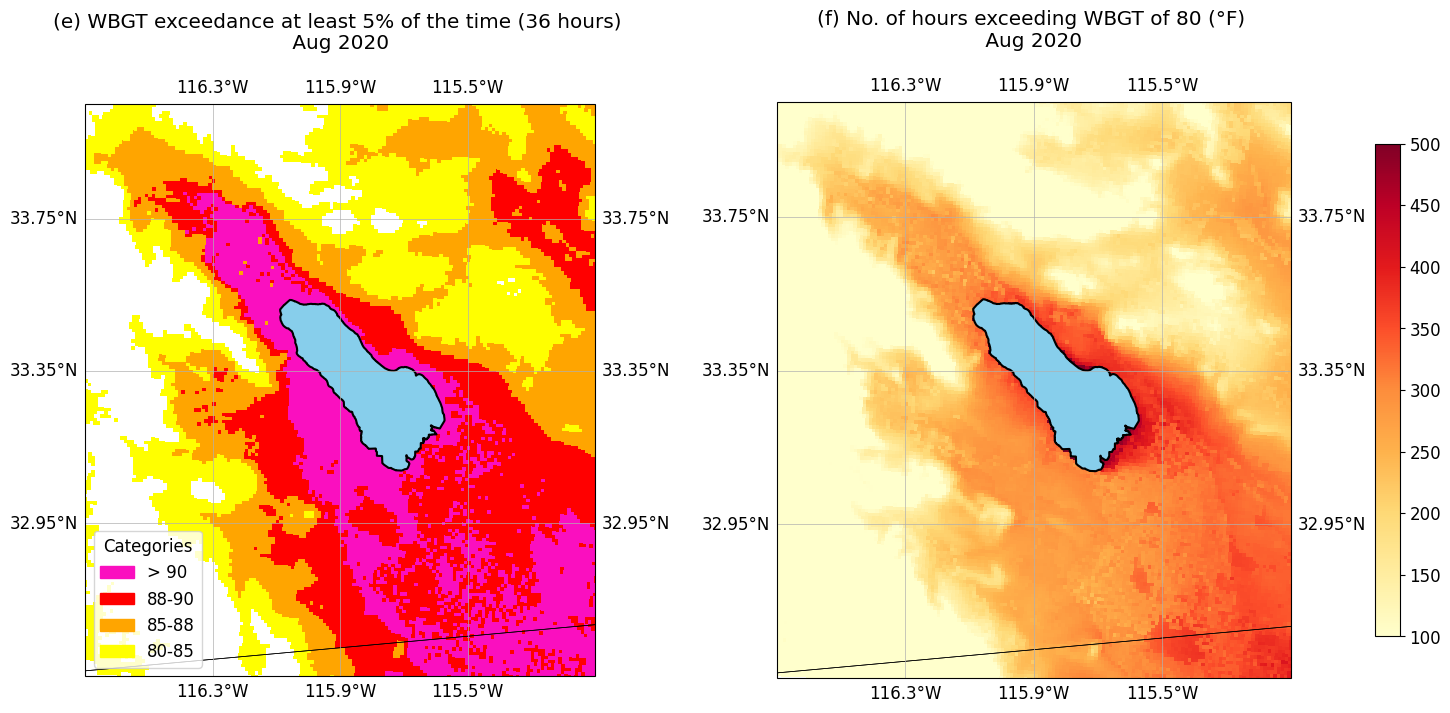

In [ ]:
# plot category map and number of hours exceeding together
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1.38]})
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the width space between subplots



# First subplot
# Create a colormap for visualization
colors = [(0.98, 0.0586, 0.75), 'red', 'orange', 'yellow']  # Assign colors to categories
cmap = plt.cm.colors.ListedColormap(colors)

ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
ax_1.pcolormesh(lon, lat, classified_map_hour, cmap=cmap)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)

legend_labels = ['> 90', '88-90', '85-88', '80-85']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(4)]
ax_1.legend(legend_handles, legend_labels, title='Categories', loc='lower left')
ax_1.set_xlabel('Longitude')
ax_1.set_ylabel('Latitude')
ax_1.set_title('(e) WBGT exceedance at least 5% of the time (36 hours) \n Aug 2020 \n')

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_hour_exceed_80, cmap='YlOrRd', vmin=100, vmax=500)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(f) No. of hours exceeding WBGT of 80 (\u00b0F) \n Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)


#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_exceedance_aug_classified.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


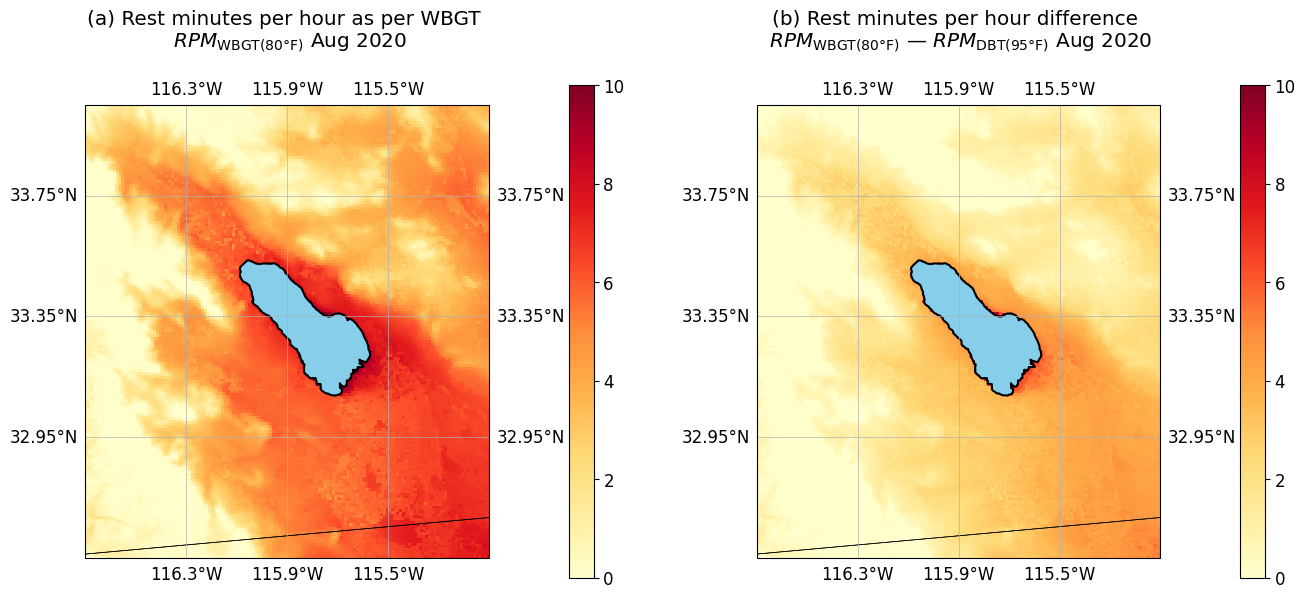

In [ ]:
# plot exceedance difference
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})


fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.18, hspace=0.2)  # Adjust the width space between subplots

# First subplot
ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_hour_exceed_80_restm_perhour, cmap='YlOrRd', vmin=0, vmax=10)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) Rest minutes per hour as per WBGT \n $RPM_{\\mathrm{WBGT (80\u00b0F)}}$ Aug 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.14)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, diff_restm_perhour, cmap='YlOrRd', vmin=0, vmax=10)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) Rest minutes per hour difference \n $RPM_{\\mathrm{WBGT (80\u00b0F)}}$ \u2014 $RPM_{\\mathrm{DBT (95\u00b0F)}}$ Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.14)



#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_exceedance_restm_perhour_aug.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


In [ ]:
print(np.nanmax(diff_restm_perhour.flatten()))
print(np.nanmax(wbgt_f_hour_exceed_80_restm_perhour.flatten()))
print(np.nanmax(t2_f_hour_exceed_95_restm_perhour.flatten()))

10.71236559139785
14.596774193548388
4.435483870967742


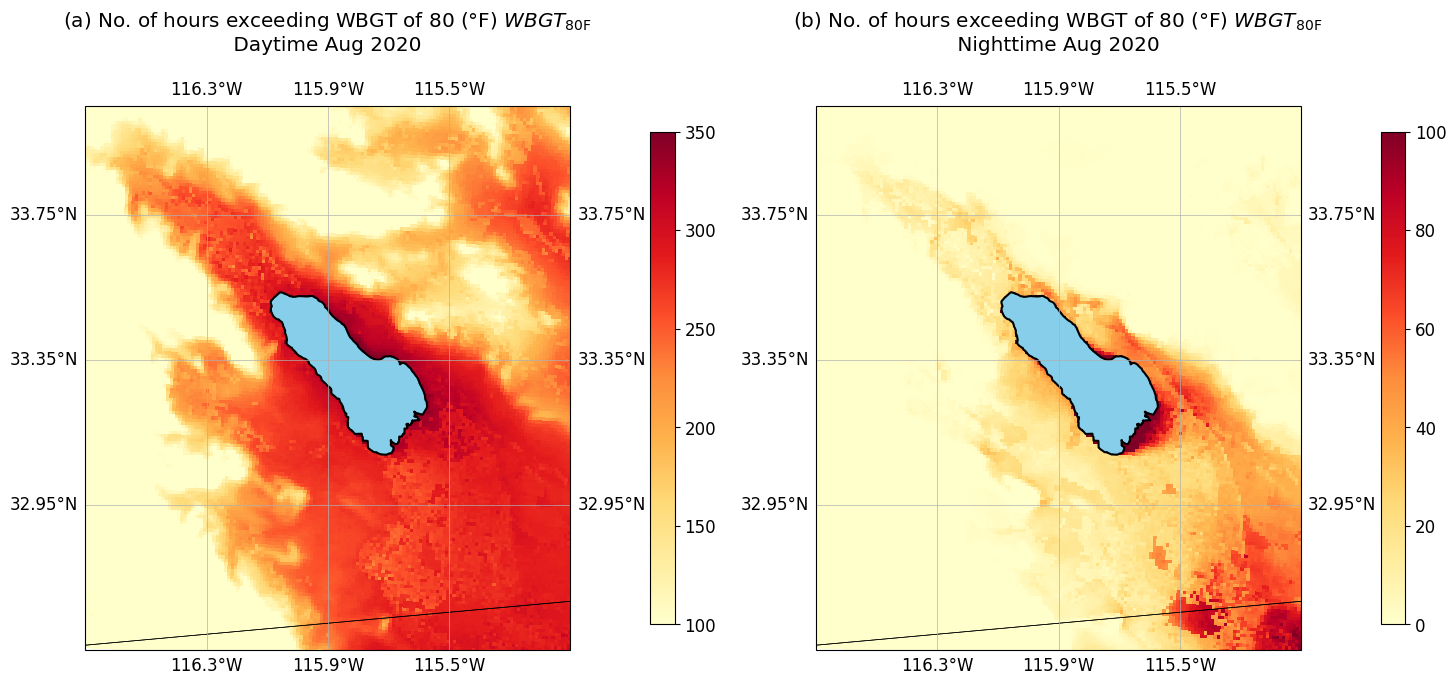

In [ ]:
# plot exceedance total hours for day and night
import numpy as np
import matplotlib.pyplot as plt

fig, ((ax_1, ax_2)) = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()}, gridspec_kw={'width_ratios': [1, 1]})
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Adjust the width space between subplots

ax_1.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_1 = ax_1.pcolormesh(lon, lat, wbgt_f_hour_exceed_80_day, cmap='YlOrRd', vmin=100, vmax=350)
counties.plot(ax=ax_1, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_1, linewidth=1.5, color='black', facecolor='skyblue')
ax_1.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_1.set_title('(a) No. of hours exceeding WBGT of 80 (\u00b0F) $WBGT_{\\mathrm{80F}}$ \n Daytime Aug 2020 \n');
cbar_1 = plt.colorbar(mesh_1, ax=ax_1, shrink=0.8, pad=0.12)

ax_2.set_extent([-116.7, -115.1, 32.55, 34.05])
mesh_2 = ax_2.pcolormesh(lon, lat, wbgt_f_hour_exceed_80_night, cmap='YlOrRd', vmin=0, vmax=100)
counties.plot(ax=ax_2, edgecolor='k', linewidth=0.5, facecolor='none')
salton.plot(ax=ax_2, linewidth=1.5, color='black', facecolor='skyblue')
ax_2.gridlines(xlocs=np.arange(-116.7, -115.1, 0.4), ylocs=np.arange(32.55, 34.05, 0.4), linewidth=0.5, draw_labels=True)
ax_2.set_title('(b) No. of hours exceeding WBGT of 80 (\u00b0F) $WBGT_{\\mathrm{80F}}$ \n Nighttime Aug 2020 \n');
cbar_2 = plt.colorbar(mesh_2, ax=ax_2, shrink=0.8, pad=0.12)

#plt.savefig('/content/drive/MyDrive/Google_Drive_UTmail/SDSU/Figures/spatial_wbgt_exceedance_total_hours_day_night.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [ ]:
# find grid points where t2_f is greater or less than WBGT

import numpy as np


# Extract points where t2_f_reshape_day_sensor is greater than wbgt_f_reshape_day_sensor
greater_than = np.sum(t2_f_reshape_day_sensor > wbgt_f_reshape_day_sensor)

# Extract points where t2_f_reshape_day_sensor is less than wbgt_f_reshape_day_sensor
less_than = np.sum(t2_f_reshape_day_sensor < wbgt_f_reshape_day_sensor)

print("Number of points where t2_f_reshape_day_sensor is greater than wbgt_f_reshape_day_sensor:", greater_than)
print("Number of points where t2_f_reshape_day_sensor is less than wbgt_f_reshape_day_sensor:", less_than)


Number of points where t2_f_reshape_day_sensor is greater than wbgt_f_reshape_day_sensor: 10218594
Number of points where t2_f_reshape_day_sensor is less than wbgt_f_reshape_day_sensor: 3443
